#Preliminary operations

##Import libraries

In [1]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# stats
from scipy import stats
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
# evaluation
from sklearn.metrics import silhouette_score
# distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

##Mount Google Drive

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import datasets

In [4]:
# import dataframe (without outliers)
df = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final.xlsx", index_col="Unnamed: 0").sort_values("emotion")
df_emph_high = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final_emph_high.xlsx", index_col="Unnamed: 0").sort_values("emotion")
df_emph_low = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final_emph_low.xlsx", index_col="Unnamed: 0").sort_values("emotion")

In [5]:
# get data columns
df_data = df[["stft_mean", "mfcc_mean", "skew"]]
df_data_emph_high = df_emph_high[["stft_mean", "mfcc_mean", "skew"]]
df_data_emph_low = df_emph_low[["stft_mean", "mfcc_mean", "skew"]]

# get values from data columns
X = df_data.values
X_emph_high = df_data_emph_high.values
X_emph_low = df_data_emph_low.values

# get emotion lables from each emphasis group
y_emotion = df["emotion"]
y_emotion_emph_high = df_emph_high["emotion"]
y_emotion_emph_low = df_emph_low["emotion"]

# get emotion type from each emphasis group
y_emtype = df["emotion_type"]
y_emtype_emph_high = df_emph_high["emotion_type"]
y_emtype_emph_low = df_emph_low["emotion_type"]

##Normalization

In [6]:
# get StandardScaler
std_scaler = StandardScaler()

# normalise each emphasis group with StandardScaler
X_std = std_scaler.fit_transform(X)
X_std_emph_high = std_scaler.fit_transform(X_emph_high)
X_std_emph_low = std_scaler.fit_transform(X_emph_low)

# get MinMaxScaler
mima_scaler = MinMaxScaler()

# normalise each emphasis group with MinMaxScaler
X_mima = mima_scaler.fit_transform(X)
X_mima_emph_high = mima_scaler.fit_transform(X_emph_high)
X_mima_emph_low = mima_scaler.fit_transform(X_emph_low)

#Agglomerative

## All emphasis

In [25]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

###Complete

In [26]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model = model.fit(X_std)

In [27]:
df_data['model_labels'] = model.labels_
df_data.groupby("model_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,stft_mean,mfcc_mean,skew
model_labels,,,
0,1200,1200,1200
1,398,398,398
2,234,234,234
3,620,620,620


In [ ]:
silhouette_score(x_std, model.labels_)

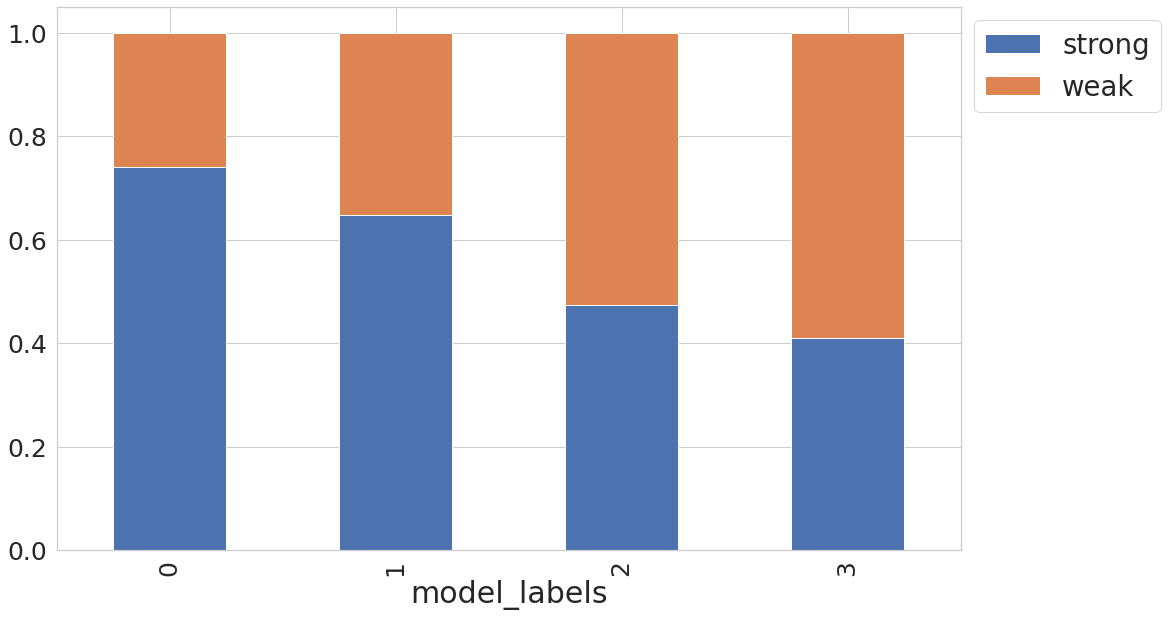

In [28]:
bar_pl = y_emtype.groupby(df_data['model_labels']).value_counts(normalize=True).unstack(1)

bar_pl.plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emtype_aggl_all_complete.svg", format="svg")
plt.show()

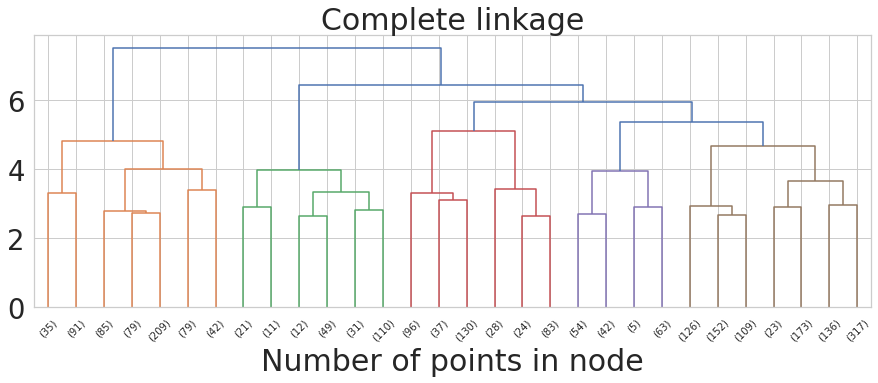

In [29]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='complete')
model = model.fit(X_std)

plt.figure(figsize=(15,5))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node")
plt.title("Complete linkage")
plt.savefig("dend_all_complete.svg", format="svg")

plt.show()

###Single

In [30]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
model = model.fit(X_std)

In [31]:
df_data['model_labels'] = model.labels_
df_data.groupby("model_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,stft_mean,mfcc_mean,skew
model_labels,,,
0,2449,2449,2449
1,1,1,1
2,1,1,1
3,1,1,1


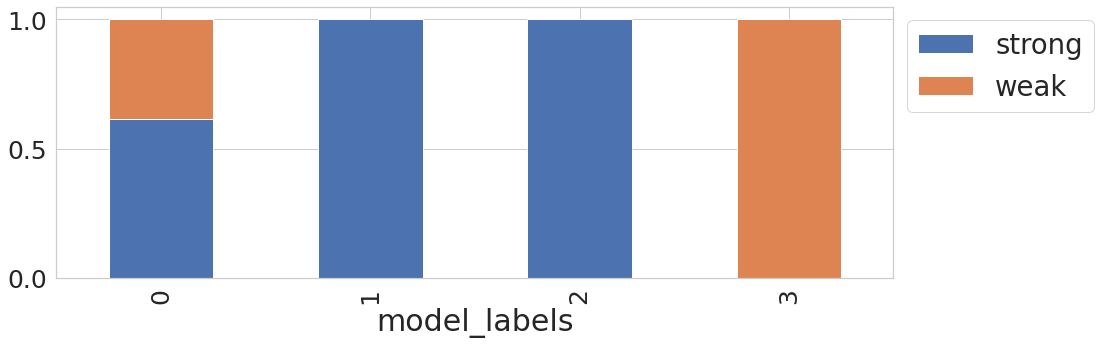

In [32]:
bar_pl = y_emtype.groupby(df_data['model_labels']).value_counts(normalize=True).unstack(1)

bar_pl.plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emtype_aggl_all_single.svg", format="svg")
plt.show()

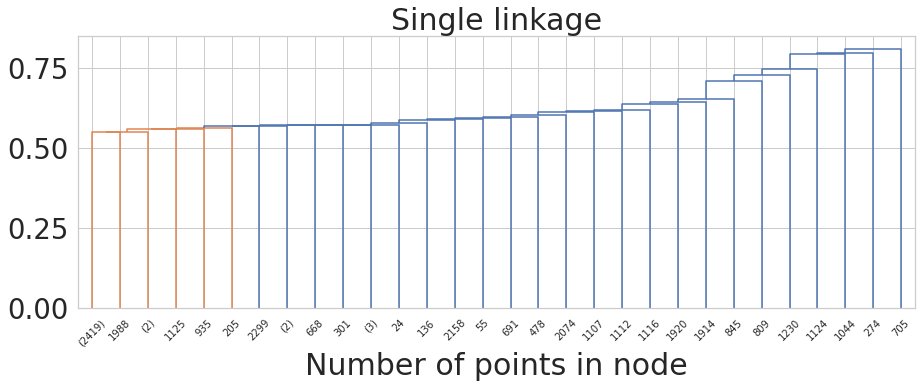

In [33]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='single')
model = model.fit(X_std)

plt.figure(figsize=(15,5))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node")
plt.title("Single linkage")
plt.savefig("dend_all_single.svg", format="svg")

plt.show()

###Average

In [34]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
model = model.fit(X_std)

In [35]:
df_data['model_labels'] = model.labels_
df_data.groupby("model_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,stft_mean,mfcc_mean,skew
model_labels,,,
0,861,861,861
1,1451,1451,1451
2,139,139,139
3,1,1,1


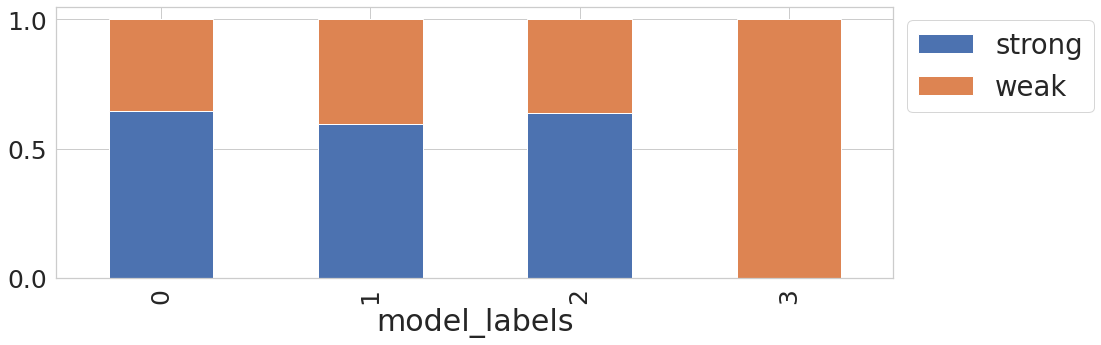

In [36]:
bar_pl = y_emtype.groupby(df_data['model_labels']).value_counts(normalize=True).unstack(1)

bar_pl.plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(15,5))
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("emtype_aggl_all_average.svg", format="svg")
plt.show()

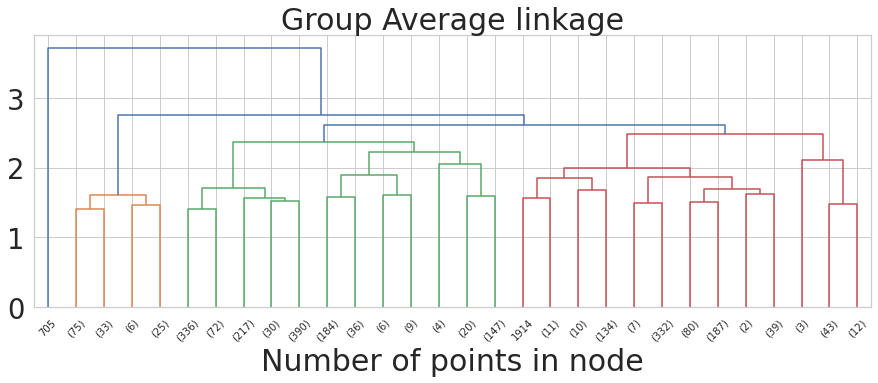

In [37]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='average')
model = model.fit(X_std)

plt.figure(figsize=(15, 5))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node")
plt.title("Group Average linkage")
plt.savefig("dend_all_average.svg", format="svg")

plt.show()

###Ward

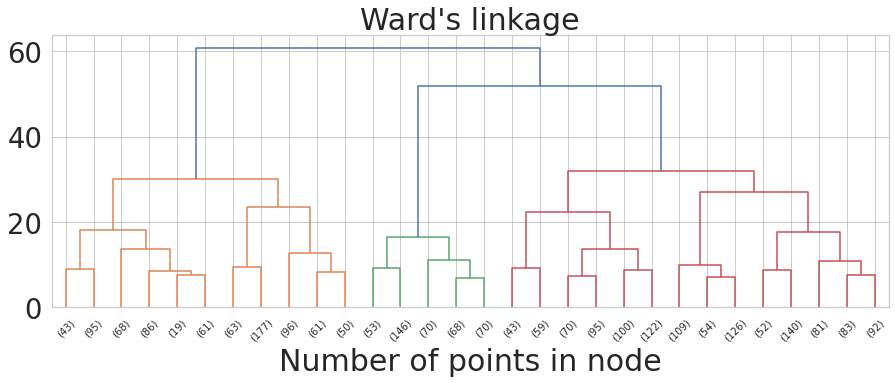

In [43]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='ward')
model = model.fit(X_std)

plt.figure(figsize=(15,5))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node")
plt.title("Ward's linkage")
plt.savefig("dend_all_ward.svg", format="svg")

plt.show()

In [53]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model = model.fit(X_std)

In [54]:
df_data['model_labels'] = model.labels_
df_data.groupby("model_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,stft_mean,mfcc_mean,skew
model_labels,,,
0,1226,1226,1226
1,819,819,819
2,407,407,407


In [55]:
silhouette_score(X_std, model.labels_)

0.23838996484651268

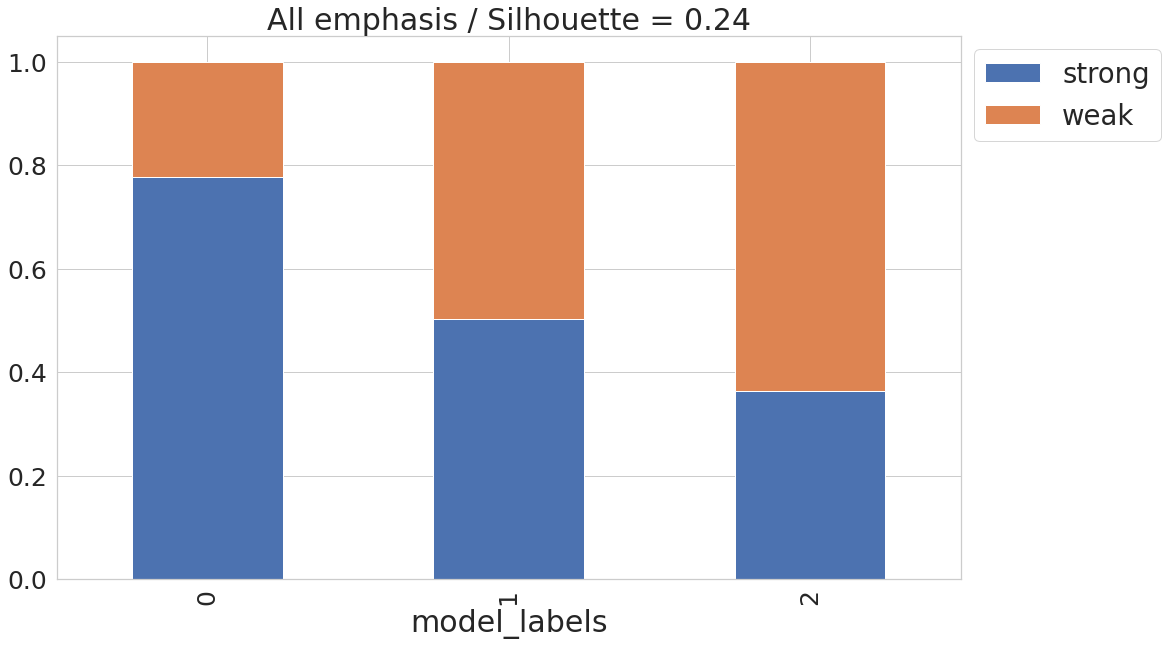

In [58]:
bar_pl = y_emtype.groupby(df_data['model_labels']).value_counts(normalize=True).unstack(1)

bar_pl.plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.title("All emphasis / Silhouette = 0.24")
plt.savefig("emtype_aggl_all.svg", format="svg")
plt.show()

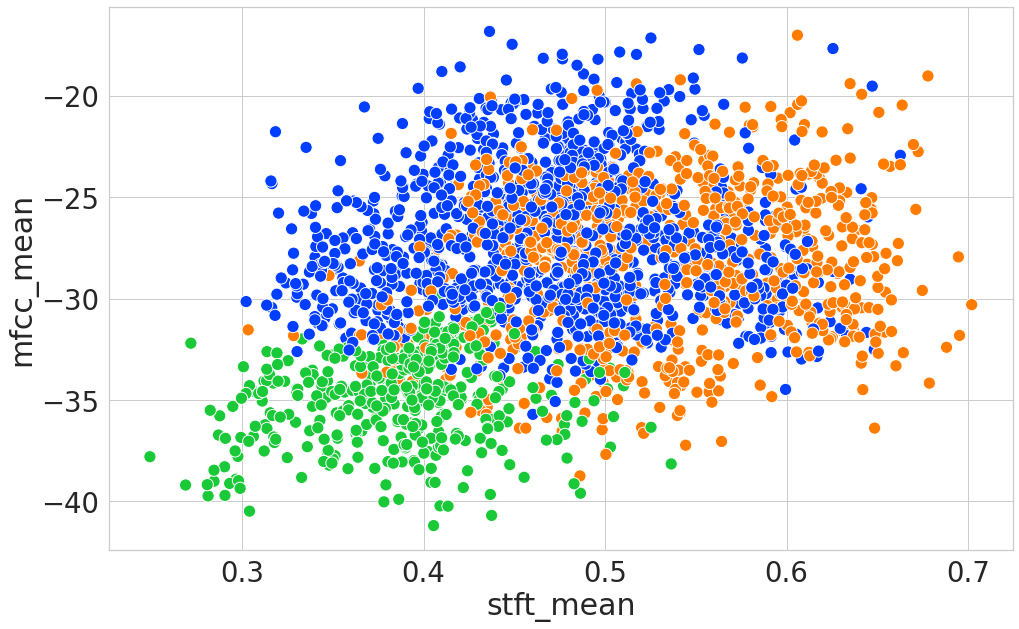

In [49]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=model.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
plt.savefig("aggl_all.svg", format="svg")
# Set title with matplotlib

##High emphasis

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

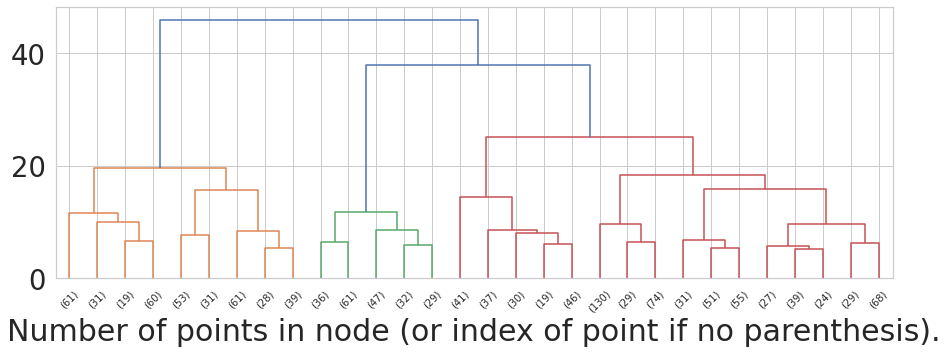

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='ward')
model = model.fit(X_std_emph_high)

plt.figure(figsize=(15,5))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig("dend_all_ward.svg", format="svg")
plt.show()

In [61]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model = model.fit(X_std_emph_high)

df_data_emph_high['model_labels'] = model.labels_
df_data_emph_high.groupby("model_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,stft_mean,mfcc_mean,skew
model_labels,,,
0,730,730,730
1,383,383,383
2,205,205,205


In [62]:
silhouette_score(X_std_emph_high, model.labels_)

0.27410424525779675

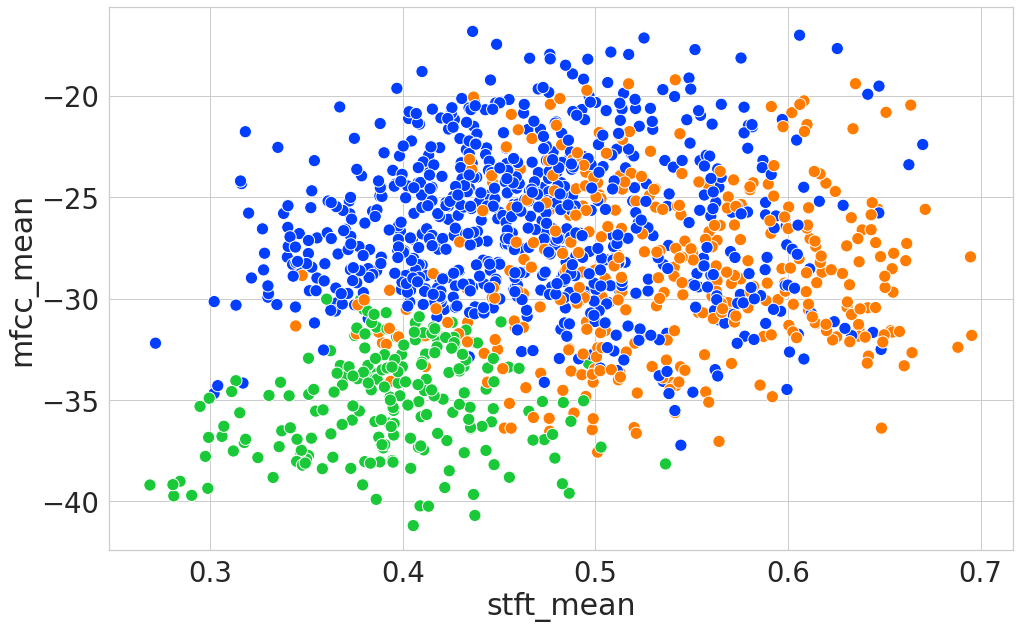

In [63]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df_emph_high, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=model.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
plt.savefig("aggl_emph_high.svg", format="svg")
# Set title with matplotlib


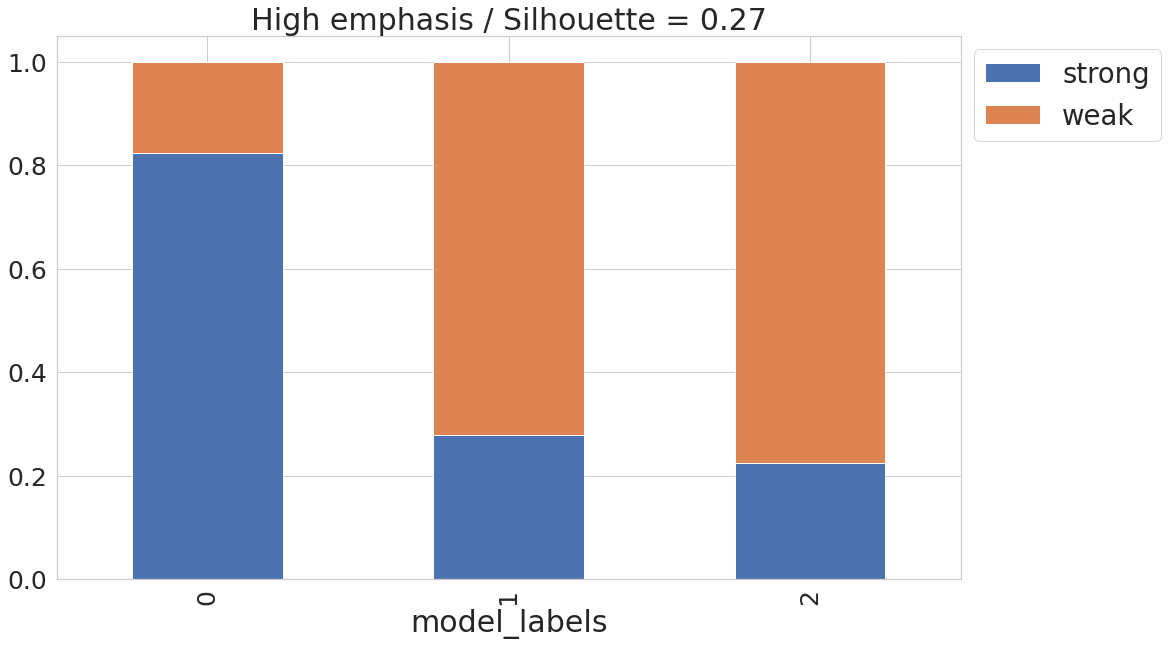

In [70]:
bar_pl = y_emtype_emph_high.groupby(df_data_emph_high['model_labels']).value_counts(normalize=True).unstack(1)

bar_pl.plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.title("High emphasis / Silhouette = 0.27")
plt.savefig("emtype_aggl_emph_high.svg", format="svg")
plt.show()

##Low emphasis

In [64]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

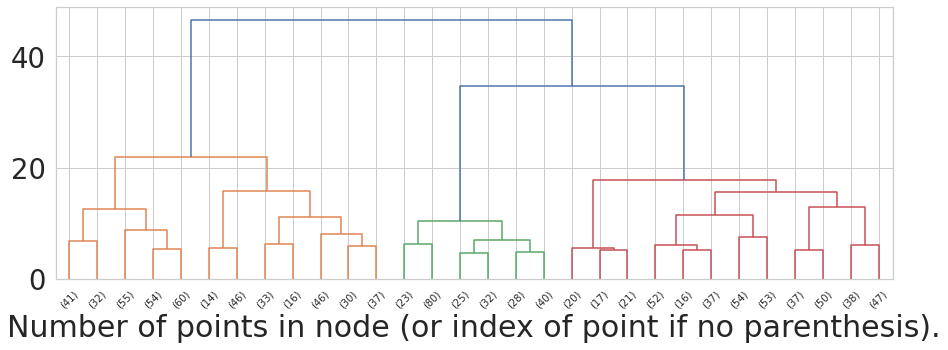

In [65]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='ward')
model = model.fit(X_std_emph_low)

plt.figure(figsize=(15,5))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig("dend_all_ward.svg", format="svg")
plt.show()

In [73]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model = model.fit(X_std_emph_low)

df_data_emph_low['model_labels'] = model.labels_
df_data_emph_low.groupby("model_labels").count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,stft_mean,mfcc_mean,skew
model_labels,,,
0,464,464,464
1,442,442,442
2,228,228,228


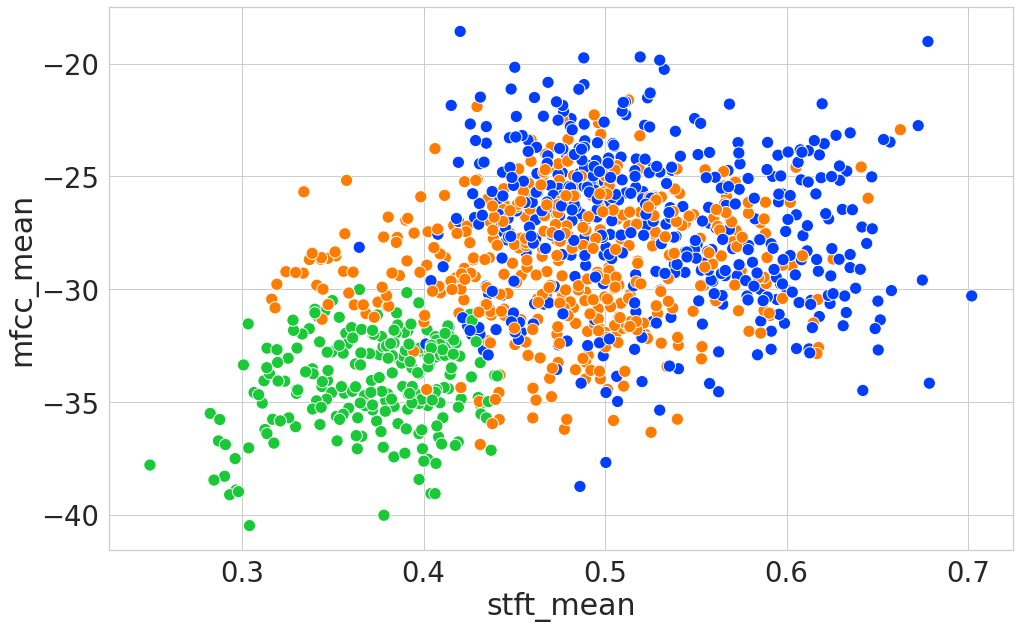

In [67]:
# Set figure size with matplotlib
plt.figure(figsize=(16.2,10))
sns.set_theme(font_scale=2.5)
sns.set_style("whitegrid")
# Create plot
sns.scatterplot(
    data=df_emph_low, 
    x="stft_mean", 
    y="mfcc_mean", 
    hue=model.labels_,
    palette="bright",
    marker="o",
    s=150,
    legend=False
)
plt.savefig("aggl_emph_low.svg", format="svg")
# Set title with matplotlib


In [74]:
silhouette_score(X_std_emph_low, model.labels_)

0.2741367012394513

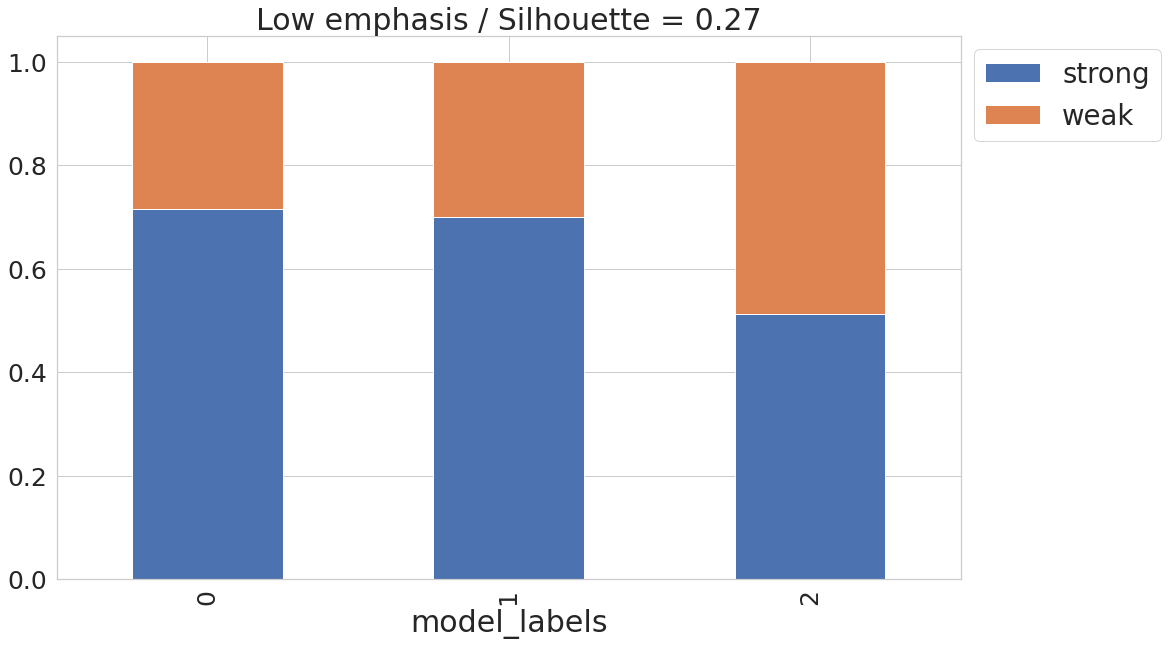

In [71]:
bar_pl = y_emtype_emph_low.groupby(df_data_emph_low['model_labels']).value_counts(normalize=True).unstack(1)

bar_pl.plot(kind='bar', stacked=True, edgecolor='white', fontsize=25, figsize=(16.2,10))
plt.legend(bbox_to_anchor=(1,1))
plt.title("Low emphasis / Silhouette = 0.27")
plt.savefig("emtype_aggl_emph_low.svg", format="svg")
plt.show()